In [389]:
import pandas as pd

features = pd.read_csv('./data/breast-cancer-wisconsin.data.txt',names = ["Sample Code number", "Clump Thickness", "Uniformity of Cell Size", "Unfiformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleol", "Mitoses", "Class"])
features.head()

,Sample Code number,Clump Thickness,Uniformity of Cell Size,Unfiformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleol,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [390]:


features = pd.get_dummies(features)
labels = np.array(features['Class'])
features = features.drop('Class',axis=1)
features = features.drop('Sample Code number',axis=1)
features.shape

(699, 19)

In [391]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier()
clf = clf.fit(features, labels)
clf.feature_importances_

model = SelectFromModel(clf, prefit=True)
features = model.transform(features)
features.shape

(699, 7)

In [392]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(features, labels, test_size = 0.25, random_state = 42)

print('Training Features Shape:', Xtrain.shape)
print('Training Labels Shape:', ytrain.shape)
print('Testing Features Shape:', Xtest.shape)
print('Testing Labels Shape:', ytest.shape)

Training Features Shape: (524, 7)
Training Labels Shape: (524,)
Testing Features Shape: (175, 7)
Testing Labels Shape: (175,)


In [393]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(Xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [394]:
importances = model.feature_importances_

indices = np.argsort(importances)[::-1]
for f in range(features.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

1. feature 1 (0.351517)
2. feature 3 (0.170625)
3. feature 4 (0.154286)
4. feature 5 (0.123041)
5. feature 0 (0.104426)
6. feature 2 (0.051584)
7. feature 6 (0.044521)


In [395]:
ypred = model.predict(Xtest)

from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

             precision    recall  f1-score   support

          2       0.97      0.98      0.98       117
          4       0.96      0.95      0.96        58

avg / total       0.97      0.97      0.97       175



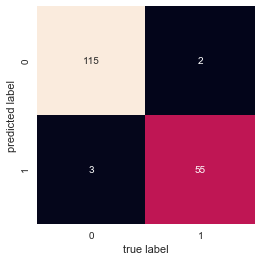

In [396]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
%matplotlib inline 
import matplotlib.pyplot as plt

mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');